In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from scipy.stats import randint as sp_randint

C:\Users\Gravemind8575\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Gravemind8575\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
with open('FinSpaceData.txt') as f:
    contentI = f.readlines()
    
content = [contentI[x].split(',') for x in range(len(contentI))]

In [3]:
dataBaseFull = [[content[x][3],float(content[x][0]),float(content[x][1]),float(content[x][2]),float(content[x][5])] for x in range(len(content))]

In [4]:
day = '20150605'
dataBase = []
for x in dataBaseFull :
    if x[0] == day :
        dataBase.append([1,x[1],x[2],x[3],x[4]])

In [5]:
len(dataBase)

58

In [6]:
def calcVectorizedCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [7]:
X = [x[:-1] for x in dataBase]
y = [x[-1] for x in dataBase]

In [8]:
model = linear_model.LinearRegression(fit_intercept = False)
model.fit(X,y)
the = np.matrix(model.coef_)
calcVectorizedCost(X,y,the)


412.98842519744733

In [9]:
temp = '{:0>2}'
temp.format(3)

'03'

In [10]:
[x for x in range(1,12)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Blind Spd Regression

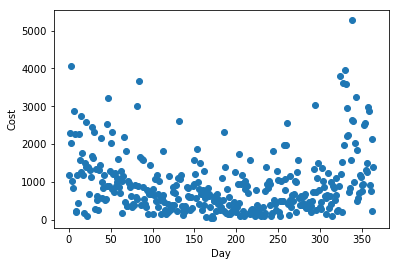

934.95488944611373

In [11]:
ye = '2015'
mos = [31,28,31,30,31,30,31,31,30,31,30,31]
yeDat = []
nStats = []
for i in range(1,13) :
    for j in range(1,mos[i-1]+1) :
        mo = '{:0>2}'.format(i)
        da = '{:0>2}'.format(j)
        day = ye+mo+da
        dataBase = []
        for x in dataBaseFull :
            if x[0] == day :
                dataBase.append([1,x[1],x[2],x[3],x[4]])
        if len(dataBase) > 0 :
            nStats.append(len(dataBase))
            X = [x[:-1] for x in dataBase]
            y = [x[-1] for x in dataBase]
            model = linear_model.LinearRegression(fit_intercept = False)
            model.fit(X,y)
            the = np.matrix(model.coef_)
            yeDat.append(calcVectorizedCost(X,y,the))
fig, ax = plt.subplots()
ax.scatter(range(len(yeDat)),yeDat)
ax.set_xlabel('Day')
ax.set_ylabel('Cost')
plt.show()
np.mean(yeDat)

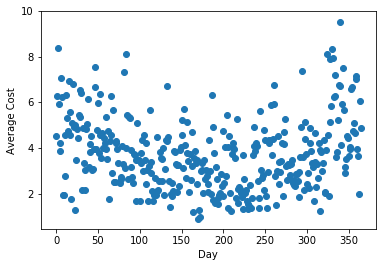

In [12]:
avC = [np.sqrt(yeDat[x]/nStats[x]) for x in range(len(yeDat))]
fig, ax = plt.subplots()
ax.scatter(range(len(avC)),avC)
ax.set_xlabel('Day')
ax.set_ylabel('Average Cost')
plt.show()

Blind Dir Regression (in degrees)

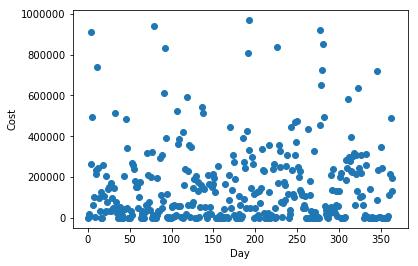

150188.21740050166

In [13]:
dataBaseFull2 = [[content[x][3],float(content[x][0]),float(content[x][1]),float(content[x][2]),float(content[x][4])*180/np.pi] for x in range(len(content))]
for i in range(len(dataBaseFull2)) :
    if dataBaseFull2[i][4] < 0:
        dataBaseFull2[i][4] += 360
ye = '2015'
mos = [31,28,31,30,31,30,31,31,30,31,30,31]
yeDat2 = []
nStats2 = []
for i in range(1,13) :
    for j in range(1,mos[i-1]+1) :
        mo = '{:0>2}'.format(i)
        da = '{:0>2}'.format(j)
        day = ye+mo+da
        dataBase = []
        for x in dataBaseFull2 :
            if x[0] == day :
                dataBase.append([1,x[1],x[2],x[3],x[4]])
        if len(dataBase) > 0 :
            nStats2.append(len(dataBase))
            X = [x[:-1] for x in dataBase]
            y = [x[-1] for x in dataBase]
            model = linear_model.LinearRegression(fit_intercept = False)
            model.fit(X,y)
            the = np.matrix(model.coef_)
            yeDat2.append(calcVectorizedCost(X,y,the))
fig, ax = plt.subplots()
ax.scatter(range(len(yeDat2)),yeDat2)
ax.set_xlabel('Day')
ax.set_ylabel('Cost')
plt.show()
np.mean(yeDat2)

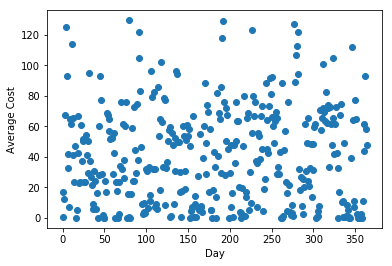

In [14]:
avC2 = [np.sqrt(yeDat2[x]/nStats2[x]) for x in range(len(yeDat2))]
fig, ax = plt.subplots()
ax.scatter(range(len(avC2)),avC2)
ax.set_xlabel('Day')
ax.set_ylabel('Average Cost')
plt.show()

Poly Features - Spd

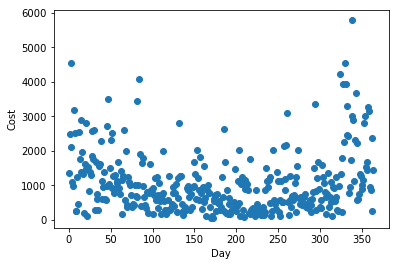

1049.8183730157718

In [15]:
ye = '2015'
mos = [31,28,31,30,31,30,31,31,30,31,30,31]
yeDat3 = []
nStats3 = []
for i in range(1,13) :
    for j in range(1,mos[i-1]+1) :
        mo = '{:0>2}'.format(i)
        da = '{:0>2}'.format(j)
        day = ye+mo+da
        dataBase = []
        for x in dataBaseFull :
            if x[0] == day :
                dataBase.append([1,x[1],x[2],x[3],x[1]*x[1],x[1]*x[2],x[1]*x[3],x[2]*x[2],x[2]*x[3],x[3]*x[3],x[4]])
        if len(dataBase) > 0 :
            nStats3.append(len(dataBase))
            X = [x[:-1] for x in dataBase]
            y = [x[-1] for x in dataBase]
            model = linear_model.LinearRegression(fit_intercept = False)
            model.fit(X,y)
            the = np.matrix(model.coef_)
            yeDat3.append(calcVectorizedCost(X,y,the))
fig, ax = plt.subplots()
ax.scatter(range(len(yeDat3)),yeDat3)
ax.set_xlabel('Day')
ax.set_ylabel('Cost')
plt.show()
np.mean(yeDat3)

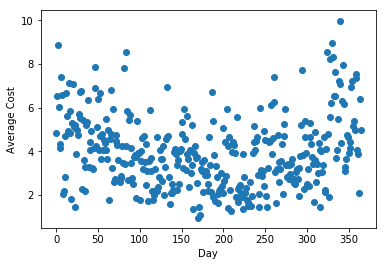

In [16]:
avC3 = [np.sqrt(yeDat3[x]/nStats3[x]) for x in range(len(yeDat))]
fig, ax = plt.subplots()
ax.scatter(range(len(avC3)),avC3)
ax.set_xlabel('Day')
ax.set_ylabel('Average Cost')
plt.show()

Poly - Dir

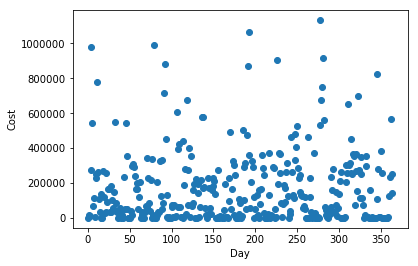

166683.42966385852

In [17]:
ye = '2015'
mos = [31,28,31,30,31,30,31,31,30,31,30,31]
yeDat4 = []
nStats4 = []
for i in range(1,13) :
    for j in range(1,mos[i-1]+1) :
        mo = '{:0>2}'.format(i)
        da = '{:0>2}'.format(j)
        day = ye+mo+da
        dataBase = []
        for x in dataBaseFull2 :
            if x[0] == day :
                dataBase.append([1,x[1],x[2],x[3],x[1]*x[1],x[1]*x[2],x[1]*x[3],x[2]*x[2],x[2]*x[3],x[3]*x[3],x[4]])
        if len(dataBase) > 0 :
            nStats4.append(len(dataBase))
            X = [x[:-1] for x in dataBase]
            y = [x[-1] for x in dataBase]
            model = linear_model.LinearRegression(fit_intercept = False)
            model.fit(X,y)
            the = np.matrix(model.coef_)
            yeDat4.append(calcVectorizedCost(X,y,the))
fig, ax = plt.subplots()
ax.scatter(range(len(yeDat4)),yeDat4)
ax.set_xlabel('Day')
ax.set_ylabel('Cost')
plt.show()
np.mean(yeDat4)

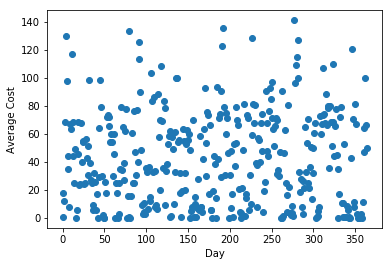

In [18]:
avC4 = [np.sqrt(yeDat4[x]/nStats4[x]) for x in range(len(yeDat))]
fig, ax = plt.subplots()
ax.scatter(range(len(avC4)),avC4)
ax.set_xlabel('Day')
ax.set_ylabel('Average Cost')
plt.show()

Temp Spd Reg

In [19]:
dataBaseFull3 = [[content[x][3],float(content[x][0]),float(content[x][1]),float(content[x][2]),content[x][7],float(content[x][5])] for x in range(len(content))]
dels = []
for j in range(len(dataBaseFull3)) :
    if '*' in dataBaseFull3[j][4] :
        dels.append(j)
    else :
        dataBaseFull3[j][4]  = float(dataBaseFull3[j][4])
dels.reverse()
for j in dels :
    del dataBaseFull3[j]
len(dataBaseFull3)

20750

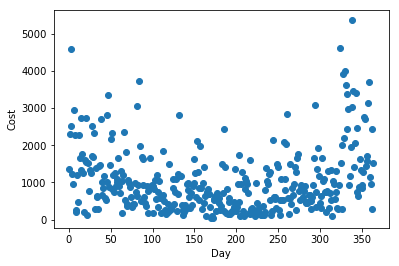

1043.4892719954296

In [20]:
ye = '2015'
mos = [31,28,31,30,31,30,31,31,30,31,30,31]
yeDat5 = []
nStats5 = []
for i in range(1,13) :
    for j in range(1,mos[i-1]+1) :
        mo = '{:0>2}'.format(i)
        da = '{:0>2}'.format(j)
        day = ye+mo+da
        dataBase = []
        for x in dataBaseFull3 :
            if x[0] == day :
                dataBase.append([1,x[1],x[2],x[3],x[4],x[5]])
        if len(dataBase) > 0 :
            nStats5.append(len(dataBase))
            X = [x[:-1] for x in dataBase]
            y = [x[-1] for x in dataBase]
            model = linear_model.LinearRegression(fit_intercept = False)
            model.fit(X,y)
            the = np.matrix(model.coef_)
            yeDat5.append(calcVectorizedCost(X,y,the))
fig, ax = plt.subplots()
ax.scatter(range(len(yeDat5)),yeDat5)
ax.set_xlabel('Day')
ax.set_ylabel('Cost')
plt.show()
np.mean(yeDat5)

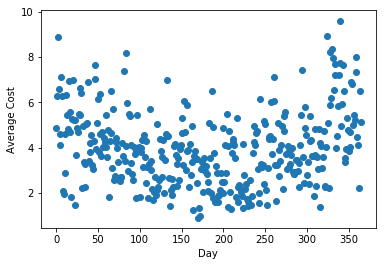

In [21]:
avC5 = [np.sqrt(yeDat5[x]/nStats5[x]) for x in range(len(yeDat5))]
fig, ax = plt.subplots()
ax.scatter(range(len(avC5)),avC5)
ax.set_xlabel('Day')
ax.set_ylabel('Average Cost')
plt.show()

SLP Spd Reg

In [22]:
dataBaseFull4 = [[content[x][3],float(content[x][0]),float(content[x][1]),float(content[x][2]),content[x][8],float(content[x][5])] for x in range(len(content))]
dels = []
for j in range(len(dataBaseFull4)) :
    if '*' in dataBaseFull4[j][4] :
        dels.append(j)
    else :
        dataBaseFull4[j][4]  = float(dataBaseFull4[j][4])
dels.reverse()
for j in dels :
    del dataBaseFull4[j]
len(dataBaseFull4)

17090

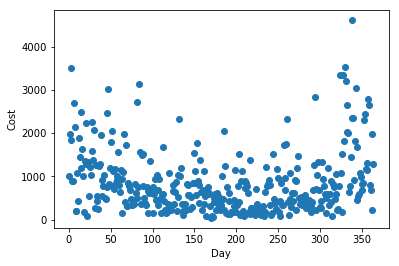

849.41324643042697

In [23]:
ye = '2015'
mos = [31,28,31,30,31,30,31,31,30,31,30,31]
yeDat6 = []
nStats6 = []
for i in range(1,13) :
    for j in range(1,mos[i-1]+1) :
        mo = '{:0>2}'.format(i)
        da = '{:0>2}'.format(j)
        day = ye+mo+da
        dataBase = []
        for x in dataBaseFull4 :
            if x[0] == day :
                dataBase.append([1,x[1],x[2],x[3],x[4],x[5]])
        if len(dataBase) > 0 :
            nStats6.append(len(dataBase))
            X = [x[:-1] for x in dataBase]
            y = [x[-1] for x in dataBase]
            model = linear_model.LinearRegression(fit_intercept = False)
            model.fit(X,y)
            the = np.matrix(model.coef_)
            yeDat6.append(calcVectorizedCost(X,y,the))
fig, ax = plt.subplots()
ax.scatter(range(len(yeDat6)),yeDat6)
ax.set_xlabel('Day')
ax.set_ylabel('Cost')
plt.show()
np.mean(yeDat6)

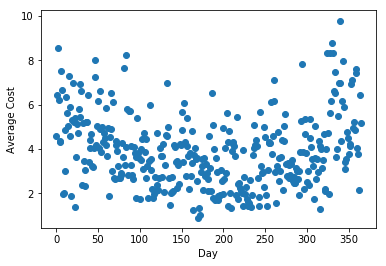

In [24]:
avC6 = [np.sqrt(yeDat6[x]/nStats6[x]) for x in range(len(yeDat6))]
fig, ax = plt.subplots()
ax.scatter(range(len(avC6)),avC6)
ax.set_xlabel('Day')
ax.set_ylabel('Average Cost')
plt.show()

Temp & SLP Spd Reg

In [25]:
dataBaseFull5 = [[content[x][3],float(content[x][0]),float(content[x][1]),float(content[x][2]),content[x][7],content[x][8],float(content[x][5])] for x in range(len(content))]
dels = []
for j in range(len(dataBaseFull5)) :
    if '*' in dataBaseFull5[j][4] or  '*' in dataBaseFull5[j][5]:
        dels.append(j)
    else :
        dataBaseFull5[j][4]  = float(dataBaseFull5[j][4])
        dataBaseFull5[j][5]  = float(dataBaseFull5[j][5])
dels.reverse()
for j in dels :
    del dataBaseFull5[j]
len(dataBaseFull5)

17090

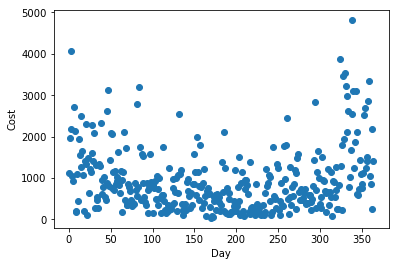

933.47119997761581

In [26]:
ye = '2015'
mos = [31,28,31,30,31,30,31,31,30,31,30,31]
yeDat7 = []
nStats7 = []
for i in range(1,13) :
    for j in range(1,mos[i-1]+1) :
        mo = '{:0>2}'.format(i)
        da = '{:0>2}'.format(j)
        day = ye+mo+da
        dataBase = []
        for x in dataBaseFull5 :
            if x[0] == day :
                dataBase.append([1,x[1],x[2],x[3],x[4],x[5],x[6]])
        if len(dataBase) > 0 :
            nStats7.append(len(dataBase))
            X = [x[:-1] for x in dataBase]
            y = [x[-1] for x in dataBase]
            model = linear_model.LinearRegression(fit_intercept = False)
            model.fit(X,y)
            the = np.matrix(model.coef_)
            yeDat7.append(calcVectorizedCost(X,y,the))
fig, ax = plt.subplots()
ax.scatter(range(len(yeDat7)),yeDat7)
ax.set_xlabel('Day')
ax.set_ylabel('Cost')
plt.show()
np.mean(yeDat7)

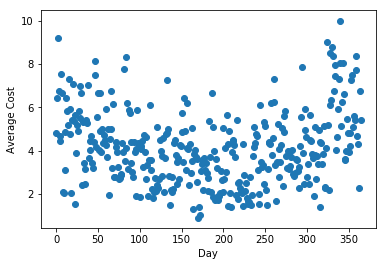

In [27]:
avC7 = [np.sqrt(yeDat7[x]/nStats7[x]) for x in range(len(yeDat7))]
fig, ax = plt.subplots()
ax.scatter(range(len(avC7)),avC7)
ax.set_xlabel('Day')
ax.set_ylabel('Average Cost')
plt.show()